# Загружаем данные

In [1]:
import pandas as pd
import numpy as np

orig_data = pd.read_excel('Plan_Lib.xlsx')
data = orig_data.copy()

In [2]:
data.head()

,Код товара,Старый код,Наименование товара ENG,Наименование товара,Food/HPC,Подкатегория,Категория,Маркет,Бренд,Сектор,...,Ветподнадзорность,ТН ВЭД,Вложимость в брикет,Штрих код брикета,Вес брикета (кг),"Высота брикета, мм","Длинна брикета, мм","Ширина брикета, мм",MatDescUA,MaterialGroup2
0,1,2,3,4,5,6,7,8,9,10,...,74,75,76,77,78,79,80,81,82,83
1,Item Code,Old Item Code,Item Name,Item Name Rus,Division,SubDivision,Category,Market,Brand,Sector,...,Veterinary,Commodity Code,SHRINKin,EANUPC,SHR_Sum of GrossweightKG,SHR_Sum of Height,SHR_Sum of Length,SHR_Sum of Width,MatDescUA,MaterialGroup2
2,20086134,8607178,TIMOTEI COND GUARAN -U- 12X200ML,TIMOTEI БАЛЬЗАМ-ОПОЛАСКИВАТЕЛЬ РОСКОШНЫЙ ОБЪЕМ...,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,HAIR CARE,WASH & CARE,TIMOTEI,CONDITIONER,...,NaN,3305900009,6,4605922019138,0,0,0,0,TIMOTEI Б/ОП РОЗКІШНИЙ ОБ'ЄМ 200МЛ,CLEANER
3,20086136,8607189,TIMOTEI COND AVOKAD -U- 12X200ML,TIMOTEI БАЛЬЗАМ-ОПОЛАСКИВАТЕЛЬ ИНТЕНСИВНОЕ ВОС...,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,HAIR CARE,WASH & CARE,TIMOTEI,CONDITIONER,...,NaN,3305900009,6,4605922019145,0,0,0,0,TIMOTEI Б/ОП ІНТЕНСИВНЕ ВІДНОВ 200МЛ,CLEANER
4,20277867,8780763,DOVE SHEA BUTTER BAR SOAP 48X135G,DOVE КРЕМ-МЫЛО ОБЪЯТИЯ НЕЖНОСТИ 135Г,BEAUTY & PERSONAL CARE,SKIN,SKIN CLEANSING,SKIN CLEANSING,DOVE,SKIN CLEANSING BAR,...,NaN,3401110001,NaN,NaN,0,0,0,0,DOVE КРЕМ-МИЛО ОБІЙМИ НІЖНОСТІ 135Г,SOAPTAB


In [3]:
for col in data.columns:
    print(data[2:3][col], '\n')

2    20086134
Name: Код товара, dtype: object 

2    8607178
Name: Старый код, dtype: object 

2    TIMOTEI COND GUARAN -U- 12X200ML
Name: Наименование товара ENG, dtype: object 

2    TIMOTEI БАЛЬЗАМ-ОПОЛАСКИВАТЕЛЬ РОСКОШНЫЙ ОБЪЕМ...
Name: Наименование товара, dtype: object 

2    BEAUTY & PERSONAL CARE
Name: Food/HPC, dtype: object 

2    BEAUTY & PERSONAL CARE EXCL SKIN
Name: Подкатегория, dtype: object 

2    HAIR CARE
Name: Категория, dtype: object 

2    WASH & CARE
Name: Маркет, dtype: object 

2    TIMOTEI
Name: Бренд, dtype: object 

2    CONDITIONER
Name: Сектор, dtype: object 

2    TIMOTEI REG RINSE OUT COND
Name: Бренд Вариант, dtype: object 

2    TIMOTEI CONDITIONER REG RSE OT GUARAN
Name: СабБренд, dtype: object 

2    441741087B7075801
Name: Код Бейспака, dtype: object 

2    TIMOTEI CONDITIONER RRO GUARAN 200ML
Name: Наименование Бейспака, dtype: object 

2    RUH0901
Name: DFG, dtype: object 

2    TIMOTEI COND 250ML
Name: Наименование DFG, dtype: object 

2    12
Na

### В качестве метрики "оптимальности" паллетизации будем рассматривать разницу между объёмом всего паллета и объёмом, занимаемым коробами, т.е. количество перевозимого воздуха - наша целевая переменная. Соотвественно параметры, определяющие нашу целевую переменную должны быть связаны с размерами и массами коробов, упаковок продуктов и паллетов
### Убираем из датасета колонки, не содержащую такую информацию, а также те колонки, которые повторяются или с одинаковыми показателями, но с разными единицами измерения

In [4]:
data.columns

Index(['Код товара', 'Старый код', 'Наименование товара ENG',
       'Наименование товара', 'Food/HPC', 'Подкатегория', 'Категория',
       'Маркет', 'Бренд', 'Сектор', 'Бренд Вариант', 'СабБренд',
       'Код Бейспака', 'Наименование Бейспака', 'DFG', 'Наименование DFG',
       'Шт в Коробе', 'Шт в Коробе.1', 'Вес ШТ нетто (г)',
       'Вес Короба нетто (кг)', 'Коробов на Паллете', 'Вес Паллеты нетто (кг)',
       'Вес Паллеты брутто (кг)', 'Высота Паллеты (мм)', 'ШТ на Паллете',
       'Коробов в слое', 'Слоев на Паллете', 'Срок Годности, дней', 'EAN ШТ',
       'EAN Короба', 'Штрихкод Паллеты RU', 'Штрихкод Паллеты UA',
       'Вес Короба брутто (г)', 'Вес Короба брутто (кг)', 'Длина короба (мм)',
       'Ширина короба (мм)', 'Высота короба (мм)', 'Плотность короба',
       'Вес ШТ брутто (г)', 'Вес ШТ брутто (кг)', 'Длина ШТ (мм)',
       'Ширина ШТ (мм)', 'Высота ШТ (мм)', 'Плотность ШТ', 'АВС индикатор',
       'Промо статус', 'Страна происхождения', 'Код Товара', 'Категория.1',


In [5]:
drop_columns = ['Код товара', 'Старый код', 'Наименование товара ENG',
                'Наименование товара', 'Food/HPC', 'Подкатегория', 'Категория',
                'Маркет', 'Бренд', 'Сектор', 'Бренд Вариант', 'СабБренд',
                'Наименование Бейспака', 'DFG', 'Наименование DFG',
                'Срок Годности, дней', 'EAN ШТ', 'EAN Короба', 'Штрихкод Паллеты RU', 'Штрихкод Паллеты UA',
                'АВС индикатор',  'Промо статус', 'Страна происхождения', 'CBU Name En', 'CBU Long Name Ru',
                'CorporateProductGrouping', 'CBU Short Name Ru', 
                'Short Name Ru', 'RUStatus', 'UAStatus', 'НДС РФ', 'MatDescUA',
                'MaterialGroup2', 'Шт в Коробе.1', 'Категория.1',
                'Вес Короба брутто (г)', 'Вес ШТ брутто (г)',
                'Вес брикета (кг)', 'Высота брикета, мм', 'Длинна брикета, мм', 'Ширина брикета, мм', 
                'Код Бейспака', 'Код Товара', 'ULKL', 'Market', 'CBU Code', 'Basepack APO', 'Basepack Name APO', 'FS',
                'RUCoC', 'UACoC', 'TEMPB', 'VolL', 'CBU Code.1', 'Вложимость в трей', 'Ветподнадзорность',
                'ТН ВЭД', 'Вложимость в брикет', 'Штрих код брикета']

## Убираем колонки и первые две строчки с бесполезной информацией

In [6]:
data = data.drop(drop_columns, axis=1)
data = data[2:]

In [7]:
data.columns

Index(['Шт в Коробе', 'Вес ШТ нетто (г)', 'Вес Короба нетто (кг)',
       'Коробов на Паллете', 'Вес Паллеты нетто (кг)',
       'Вес Паллеты брутто (кг)', 'Высота Паллеты (мм)', 'ШТ на Паллете',
       'Коробов в слое', 'Слоев на Паллете', 'Вес Короба брутто (кг)',
       'Длина короба (мм)', 'Ширина короба (мм)', 'Высота короба (мм)',
       'Плотность короба', 'Вес ШТ брутто (кг)', 'Длина ШТ (мм)',
       'Ширина ШТ (мм)', 'Высота ШТ (мм)', 'Плотность ШТ', 'Pal_Length',
       'Pal_Width', 'CS_Volume', 'PC_Volume'],
      dtype='object')

In [8]:
data.shape

(2393, 24)

In [9]:
for col in data.columns:
    print(col, data[col].unique().shape)

Шт в Коробе (33,)
Вес ШТ нетто (г) (641,)
Вес Короба нетто (кг) (738,)
Коробов на Паллете (166,)
Вес Паллеты нетто (кг) (953,)
Вес Паллеты брутто (кг) (987,)
Высота Паллеты (мм) (351,)
ШТ на Паллете (218,)
Коробов в слое (66,)
Слоев на Паллете (20,)
Вес Короба брутто (кг) (814,)
Длина короба (мм) (214,)
Ширина короба (мм) (169,)
Высота короба (мм) (185,)
Плотность короба (1047,)
Вес ШТ брутто (кг) (680,)
Длина ШТ (мм) (130,)
Ширина ШТ (мм) (116,)
Высота ШТ (мм) (195,)
Плотность ШТ (998,)
Pal_Length (10,)
Pal_Width (10,)
CS_Volume (497,)
PC_Volume (482,)


In [10]:
for col in data.columns:
    try:
        data[col] = data[col].astype('float64')
    except:
        print(col)

In [11]:
# преобразуем колонку с массами в граммах в колонку с массами в килограммах 
data['Вес ШТ нетто (г)'] = data['Вес ШТ нетто (г)']/1000
data = data.rename(columns={'Вес ШТ нетто (г)':'Вес ШТ нетто (кг)'})

In [12]:
V_diff = data['Pal_Length']*data['Pal_Width']*data['Высота Паллеты (мм)'] - data['CS_Volume']*data['Коробов на Паллете']*1000

In [13]:
data['V_diff'] = V_diff

In [14]:
not_opt_index = data['V_diff'].sort_values().index
not_opt_index

Int64Index([ 660, 2265, 2227, 2228, 2263, 1194,  108, 2304, 2284, 2308,
            ...
             852, 1505,  994,  686, 2260,  658, 1095, 1918, 1837, 1344],
           dtype='int64', length=2393)

In [15]:
orig_data.loc[not_opt_index][-10:]

,Код товара,Старый код,Наименование товара ENG,Наименование товара,Food/HPC,Подкатегория,Категория,Маркет,Бренд,Сектор,...,Ветподнадзорность,ТН ВЭД,Вложимость в брикет,Штрих код брикета,Вес брикета (кг),"Высота брикета, мм","Длинна брикета, мм","Ширина брикета, мм",MatDescUA,MaterialGroup2
852,67066727,NaN,BED HEAD SH PRPL TNN DMB BL 15 12X400ML,BED HEAD ШАМПУНЬ-КОРРЕКТОР ЦВЕТА 12Х400МЛ,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,HAIR CARE,WASH & CARE,BED HEAD,SHAMPOO/2IN1,...,NaN,3305100000,NaN,NaN,0,0,0,0,BED HEAD PURPLE TONING SHAMPOO DUMB BLONDE 12X...,CLEANER
1505,67309690,NaN,BED HEAD COND CALMA SUTRA 12X375ML,BED HEAD ОЧИЩАЮЩИЙ КОНДИЦИОНЕР ДЛЯ КО-ВОШИНГА ...,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,HAIR CARE,WASH & CARE,BED HEAD,CONDITIONER,...,NaN,3305900009,NaN,NaN,0,0,0,0,BED HEAD CLEANSING CONDITIONER FOR WAVES AND C...,CLEANER
994,67086713,NaN,CLEAR SH INTENSE HYDRATION 16 12X400ML,CLEAR ШАМПУНЬ ПРОТИВ ПЕРХОТИ ИНТЕНСИВНОЕ УВЛАЖ...,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,HAIR CARE,WASH & CARE,CLEAR,SHAMPOO/2IN1,...,NaN,NaN,NaN,NaN,0,0,0,0,CLEAR ШАМПУНЬ VITA ABE ПРОТИ ЛУПИ ДЛЯ ЖІНОК ІН...,CLEANER
686,67016250,NaN,S FACTOR LEAVE-IN MOISTURE SPRAY 6Х250ML,S FACTOR НЕСМЫВАЕМЫЙ СПРЕЙ-УХОД ДЛЯ ВОЛОС PAPA...,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,HAIR CARE,STYLING,S-FACTOR,SOFT STYLING,...,NaN,3305900009,NaN,NaN,0,0,0,0,S FACTOR PAPAYA LEAVE-IN MOISTURE SPRAY 6Х250ML,AEROSOLS
2260,67686977,NaN,BED HEAD FOR MEN FACE UP GFT PCK 6X275ML,BED HEAD FOR MEN НАБОР ГЛАДКИЙ Я 6X275МЛ,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,HAIR CARE,STYLING,BED HEAD,SOFT STYLING,...,NaN,NaN,NaN,NaN,0,0,0,0,BED HEAD FOR MEN FACE UP GIFT PACK 6X275ML,COSMETIC
658,67001534,NaN,S FACTOR CONDITIONER SERIOUS 6Х150ML,TIGI S FACTOR ИНТЕНСИВНЫЙ КОНДИЦИОНЕР ДЛЯ ВОЛО...,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,HAIR CARE,WASH & CARE,S-FACTOR,CONDITIONER,...,NaN,3305900009,NaN,NaN,0,0,0,0,S FACTOR SERIOUS CONDITIONER 150ML,CLEANER
1095,67109751,NaN,REXONA MEN AP ST ANTIBACTRL FRESH 6X50ML,REXONA MEN АНТИПЕРСПИРАНТ КАРАНДАШ АНТИБАКТЕРИ...,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,DEODORANTS & FRAGRANCES,DEODORANTS,REXONA MEN,DEO SOLID STICKS,...,NaN,3307200000,NaN,NaN,0,0,0,0,REXONA MEN АНТИПЕРСПІРАНТ-ОЛІВЕЦЬ АНТИБАКТЕРІА...,DEOR&ST
1918,67523521,NaN,PURE LINE BSC CR SHGEL MST&CARE 12X400ML,ОСНОВНОЙ УХОД ЧИСТАЯ ЛИНИЯ ГЕЛЬ ДЛЯ ДУША УВЛАЖ...,BEAUTY & PERSONAL CARE,SKIN,SKIN CLEANSING,SKIN CLEANSING,PURE LINE,SHOWER,...,NaN,3401300000,NaN,NaN,0,0,0,0,ОСНОВНОЙ УХОД ЧИСТАЯ ЛИНИЯ ГЕЛЬ ДЛЯ ДУША УВЛАЖ...,CLEANER
1837,67486434,NaN,SILKY HANDS CREAM-SOAP TENDERNESS 24X90G,БАРХАТНЫЕ РУЧКИ КРЕМ-МЫЛО НЕЖНОСТЬ И УХОД 24Х90Г,BEAUTY & PERSONAL CARE,SKIN,SKIN CLEANSING,SKIN CLEANSING,SILKY HANDS,SKIN CLEANSING BAR,...,NaN,3401110001,NaN,NaN,0,0,0,0,БАРХАТНЫЕ РУЧКИ КРЕМ-МЫЛО НЕЖНОСТЬ И УХОД 24Х90Г,SOAPTAB
1344,67228132,NaN,FOREST BALM MW TR EFFECT WHITEN 12X370ML,ЛЕСНОЙ БАЛЬЗАМ ОПОЛАСКИВАТЕЛЬ ДЛЯ ДЕСЕН И ЗУБО...,BEAUTY & PERSONAL CARE,BEAUTY & PERSONAL CARE EXCL SKIN,ORAL CARE,MOUTHWASH & OTHER ORAL,FOREST BALSAM,MOUTHWASH,...,NaN,3306900000,NaN,NaN,0,0,0,0,FOREST BALM MOUTHWASH TRIPLE EFFECT WHITENING ...,CLEANER


In [16]:
orig_data.loc[not_opt_index][-10:]['Наименование товара']

852             BED HEAD ШАМПУНЬ-КОРРЕКТОР ЦВЕТА 12Х400МЛ
1505    BED HEAD ОЧИЩАЮЩИЙ КОНДИЦИОНЕР ДЛЯ КО-ВОШИНГА ...
994     CLEAR ШАМПУНЬ ПРОТИВ ПЕРХОТИ ИНТЕНСИВНОЕ УВЛАЖ...
686     S FACTOR НЕСМЫВАЕМЫЙ СПРЕЙ-УХОД ДЛЯ ВОЛОС PAPA...
2260             BED HEAD FOR MEN НАБОР ГЛАДКИЙ Я 6X275МЛ
658     TIGI S FACTOR ИНТЕНСИВНЫЙ КОНДИЦИОНЕР ДЛЯ ВОЛО...
1095    REXONA MEN АНТИПЕРСПИРАНТ КАРАНДАШ АНТИБАКТЕРИ...
1918    ОСНОВНОЙ УХОД ЧИСТАЯ ЛИНИЯ ГЕЛЬ ДЛЯ ДУША УВЛАЖ...
1837     БАРХАТНЫЕ РУЧКИ КРЕМ-МЫЛО НЕЖНОСТЬ И УХОД 24Х90Г
1344    ЛЕСНОЙ БАЛЬЗАМ ОПОЛАСКИВАТЕЛЬ ДЛЯ ДЕСЕН И ЗУБО...
Name: Наименование товара, dtype: object

# Самые не оптимальные паллетизации

In [17]:
data['V_diff'].isna().sum(), data['V_diff'].shape

(0, (2393,))

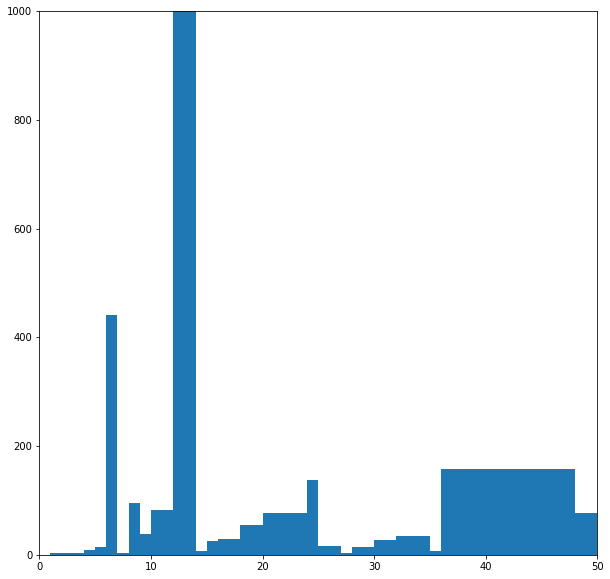

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(10,10))
num_bins = data['Шт в Коробе'].sort_values().unique()
plt.hist(data['Шт в Коробе'], num_bins)
plt.axis([0, 50, 0, 1000])
plt.show()

### Убираем из датасета примеры, не проходящие ограничения задачи по "идеальной" паллетизации

In [19]:
data = data[data['Шт в Коробе'] <=20][data['Шт в Коробе'] >= 10][data['Вес Короба брутто (кг)'] <= 15]

C:\Users\EGOR\Anaconda3\envs\Deep learning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [20]:
data = data[data['Pal_Width']<=800][data['Pal_Length']<=1200][data['Вес Паллеты брутто (кг)'] <= 650]

C:\Users\EGOR\Anaconda3\envs\Deep learning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [21]:
data = data[data['Высота Паллеты (мм)'] <= 1800]

In [22]:
data.corr()['V_diff'].sort_values() *(-1)
# здесь признаки с положительным коэффициентом корреляции означают,
# что при увеличении одного из этих признаков ведёт к уменьшению потерь объёмов

Вес Паллеты нетто (кг)     0.198054
Высота ШТ (мм)             0.185595
Вес Паллеты брутто (кг)    0.147431
Коробов в слое             0.142194
Плотность короба           0.119454
Высота короба (мм)         0.107071
Плотность ШТ               0.014590
Вес ШТ нетто (кг)         -0.003968
Вес Короба нетто (кг)     -0.013011
Вес ШТ брутто (кг)        -0.024351
Шт в Коробе               -0.040485
Вес Короба брутто (кг)    -0.041920
Ширина ШТ (мм)            -0.042091
Коробов на Паллете        -0.062913
ШТ на Паллете             -0.067985
Ширина короба (мм)        -0.070045
Длина короба (мм)         -0.085426
CS_Volume                 -0.091294
PC_Volume                 -0.139257
Длина ШТ (мм)             -0.179848
Слоев на Паллете          -0.218196
Высота Паллеты (мм)       -0.225776
V_diff                    -1.000000
Pal_Length                      NaN
Pal_Width                       NaN
Name: V_diff, dtype: float64

# PIPLINES AND GRIDSEARCHEScv
### Подбор модели и параметров

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor as rfr  # n_estimators, max_depth...
from sklearn.ensemble import GradientBoostingRegressor as gbr  # n_estimators, max_depth...

X = data.drop(columns=['V_diff'])
y = data['V_diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=30)

param_grid_rfr = [
    {
        'n_estimators':[1,10,100,500],
        'max_depth':[1,3,4,7],
        'min_samples_split':[2,5,7],
        'min_samples_leaf':[2,5,7],
        'max_features':[4,7,9],
        'max_leaf_nodes':[3,6,7,9],
    }
]
param_grid_gbr = [
    {
        'n_estimators':[1,10,100,500],
        'max_depth':[1,3,4,7],
        'min_samples_split':[2,5,7],
        'min_samples_leaf':[2,5,7],
        'max_features':[4,7,9],
        'max_leaf_nodes':[3,6,7,9],
    }
]

In [38]:
grid_rfr = GridSearchCV(rfr(), param_grid_rfr, cv=6, verbose=1, n_jobs=3)
grid_gbr = GridSearchCV(gbr(), param_grid_gbr, cv=6, verbose=1, n_jobs=3)

In [40]:
grid_rfr.fit(X_train, y_train)

Fitting 6 folds for each of 1728 candidates, totalling 10368 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  52 tasks      | elapsed:    6.3s
[Parallel(n_jobs=3)]: Done 650 tasks      | elapsed:   30.4s
[Parallel(n_jobs=3)]: Done 1650 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 3050 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done 4850 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 7050 tasks      | elapsed:  6.0min
[Parallel(n_jobs=3)]: Done 9650 tasks      | elapsed:  8.3min
[Parallel(n_jobs=3)]: Done 10368 out of 10368 | elapsed:  9.2min finished
C:\Users\EGOR\Anaconda3\envs\Deep learning\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid=[{'n_estimators': [1, 10, 100, 500], 'max_depth': [1, 3, 4, 7], 'min_samples_split': [2, 5, 7], 'min_samples_leaf': [2, 5, 7], 'max_features': [4, 7, 9], 'max_leaf_nodes': [3, 6, 7, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [41]:
grid_gbr.fit(X_train, y_train)

Fitting 6 folds for each of 1728 candidates, totalling 10368 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 714 tasks      | elapsed:   11.4s
[Parallel(n_jobs=3)]: Done 2418 tasks      | elapsed:   43.5s
[Parallel(n_jobs=3)]: Done 4418 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done 7218 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done 10368 out of 10368 | elapsed:  3.7min finished


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid=[{'n_estimators': [1, 10, 100, 500], 'max_depth': [1, 3, 4, 7], 'min_samples_split': [2, 5, 7], 'min_samples_leaf': [2, 5, 7], 'max_features': [4, 7, 9], 'max_leaf_nodes': [3, 6, 7, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [44]:
grid_gbr.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=9,
             max_leaf_nodes=9, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
grid_gbr.best_score_

0.8707447950382273

In [49]:
grid_rfr.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=9, max_leaf_nodes=9, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [50]:
grid_rfr.best_score_

0.517904119765085

In [55]:
best_model = gbr(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=9,
             max_leaf_nodes=9, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

best_model.fit(X_train, y_train)

print('Train: ',best_model.score(X_train, y_train))
print('Test:', best_model.score(X_test, y_test))

Train:  0.9995928793239839
Test: 0.9172243468541282
